In [1]:
import gym
from gym import error, spaces, utils
from swoc1 import SwocEnv
import numpy as np
from draw import DrawObservation
%matplotlib notebook
import matplotlib.pyplot as plt
from PIL import Image


GameServicePath = '../../build/GameService/GameService'

In [2]:
fieldWidth = 10
fieldHeight = 10

In [3]:
env = SwocEnv(1, GameServicePath, hostname='localhost', portOffset=0, oneTarget=False)

In [5]:
fieldObs, botObs = env.reset(fieldWidth, fieldHeight)
fieldObs.shape

(10, 10, 11)

In [ ]:
botObs

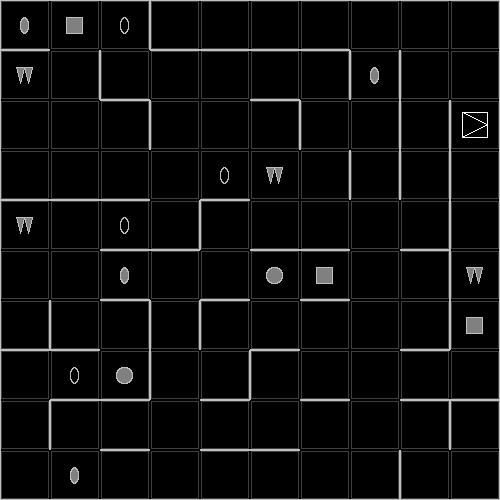

In [6]:
img = DrawObservation((fieldObs, botObs), 500, 500)
img.transpose(Image.FLIP_TOP_BOTTOM)

<IPython.core.display.Javascript object>


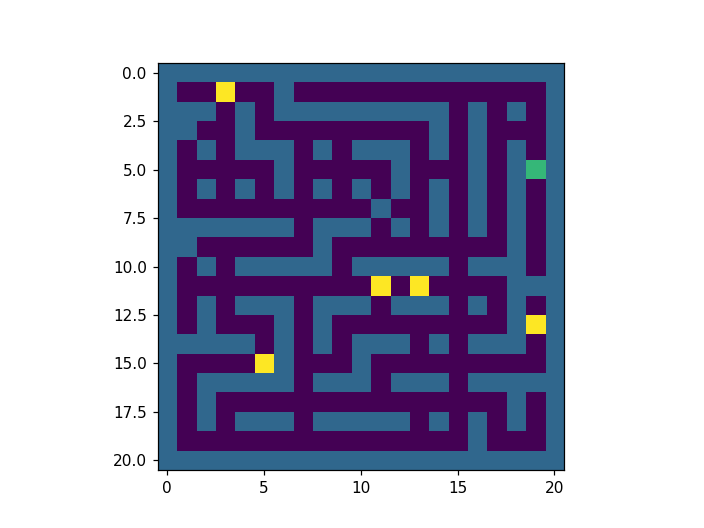

(21, 21, 4)

In [12]:
# 0 = empty, 1 = wall, 2 = bot, 3 = target
field = np.ones((fieldHeight*2+1, fieldWidth*2+1))

# empty cells
for y in range(fieldObs.shape[0]):
    cy = y*2+1
    for x in range(fieldObs.shape[1]):
        cx = x*2+1
        t,r,b,l = fieldObs[y, x, :4]
        field[cy, cx] = 0

        if not t:
            field[cy+1, cx] = 0
        if not b:
            field[cy-1, cx] = 0
        if not l:
            field[cy, cx-1] = 0
        if not r:
            field[cy, cx+1] = 0
            
        if fieldObs[y,x,4]: # coin
            field[cy, cx] = 3
        elif fieldObs[y,x,5]: # treasure chest
            field[cy, cx] = 3
        elif fieldObs[y,x,8]: # spike trap
            field[cy, cx] = 1 # pretend its a wall
        else:
            # ignore: empty chest, mimic chest, bottle, test tube
            pass

# target
#print(targetObs.shape)
#for target in fieldObs[4:]:
#    tx = int(target[0]*fieldWidth*2 + 0.5)  # round to nearest int
#    ty = int(target[1]*fieldHeight*2 + 0.5)
#    field[ty, tx] = 3

# bot
bx = int(botObs[0]*fieldWidth*2 + 0.5)  # round to nearest int
by = int(botObs[1]*fieldHeight*2 + 0.5)
bx = np.clip(bx, 0, field.shape[1]-1)
by = np.clip(by, 0, field.shape[0]-1)
field[by, bx] = 2


from tensorflow.keras.utils import to_categorical
field = to_categorical(field, num_classes=4)

plt.figure()
plt.imshow(np.argmax(field, axis=-1))

field.shape

In [ ]:
img = np.argmax(field, axis=-1) / 3
img = plt.get_cmap('viridis')(img)
img = Image.fromarray(np.uint8(img*255), mode='RGBA')

plt.figure()
plt.imshow(img)
